In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Tendencia é igual a direção, ou seja, para onde os dados estão indo, exemplos: Lucros de uma empresa.


Sazonalidade é a recorrência das oscilações.


Resíduo é o que sobra do sinal.

In [37]:
df_path = "https://raw.githubusercontent.com/carlosfab/datasets/master/electricity_consumption/Electric_Production.csv"
df = pd.read_csv(df_path)

In [38]:
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [39]:
df.tail()

,DATE,Value
392,09-01-2017,98.6154
393,10-01-2017,93.6137
394,11-01-2017,97.3359
395,12-01-2017,114.7212
396,01-01-2018,129.4048


In [40]:
df.shape

(397, 2)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    397 non-null    object 
 1   Value   397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [42]:
df.index = pd.to_datetime(df["DATE"], format = "%m-%d-%Y")

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    397 non-null    object 
 1   Value   397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [44]:
df.drop("DATE", inplace=True, axis=1)

In [45]:
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [46]:
df.loc['1986-06-01']

Value    59.9005
Name: 1986-06-01 00:00:00, dtype: float64

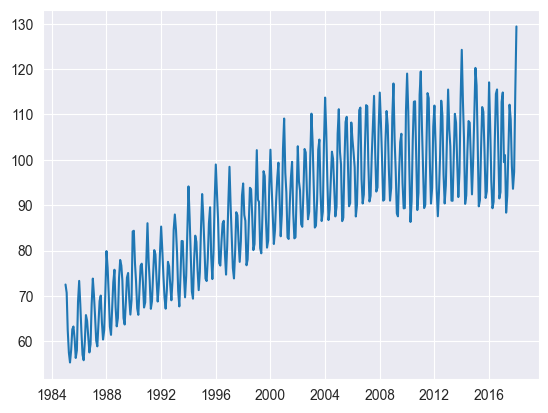

In [47]:
plt.plot(df.index, df["Value"])

In [48]:
resultados = seasonal_decompose(df)

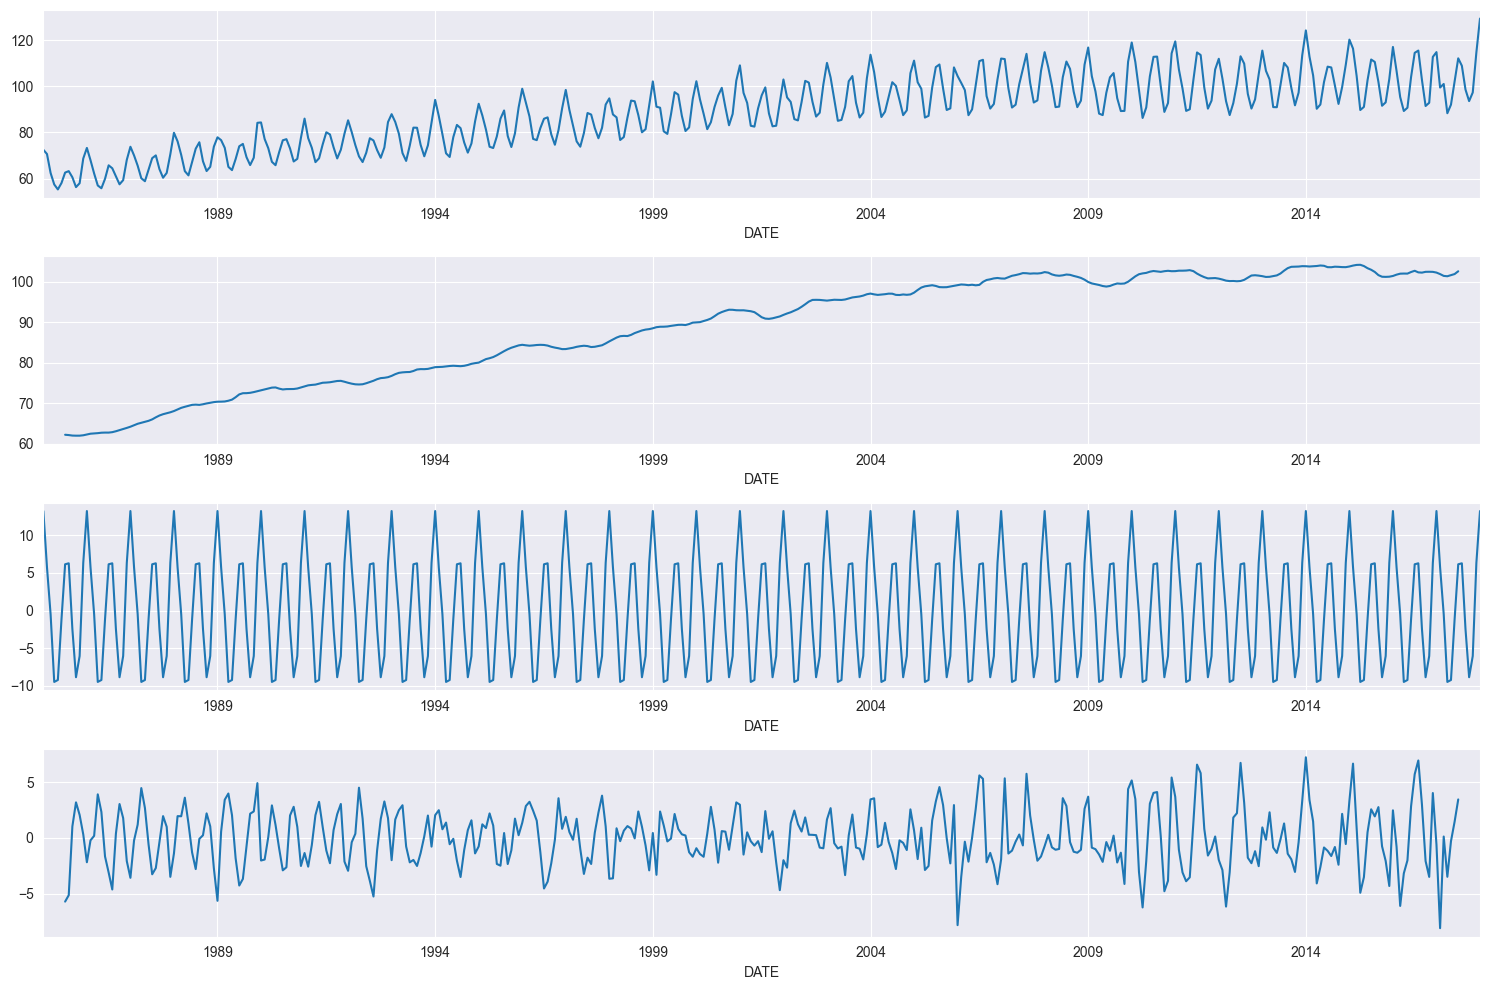

In [49]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15,10))

resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)

plt.tight_layout()

In [50]:
# Estacionário ou não estacionária

# ADF - Augmented Dickey Fuller

# H0 - Hipótese Nula (quando não é estacionária)

# H1 - Hipótese alternativa (rejeição da hipótese nula)

# p -value = 0.05 (5%), então rejeitamos H0 com um nível de confiança de 95%

In [51]:
sns.set_style('darkgrid')

In [52]:
X = df["Value"].values

In [53]:
result = adfuller(X)

print("Teste ADF")
print(f"Teste Estatístico: {result[0]}")
print(f"Teste P-Value: {result[1]}")
print("Valores críticos: ")

for key, value in result[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -2.2569903500472277
Teste P-Value: 0.1862146911658734
Valores críticos: 
	1%: -3.4476305904172904
	5%: -2.869155980820355
	10%: -2.570827146203181


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

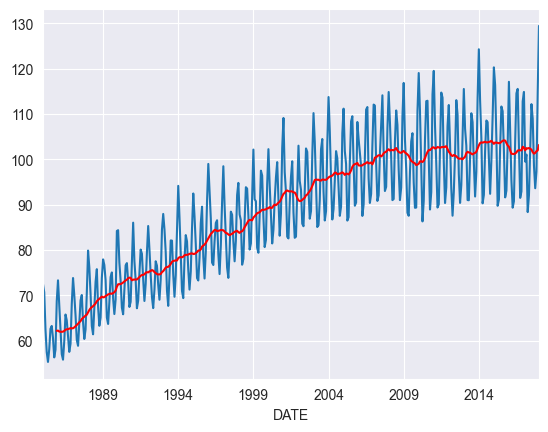

In [54]:
ma = df.rolling(12).mean()

f, ax = plt.subplots()

df.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='red')
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

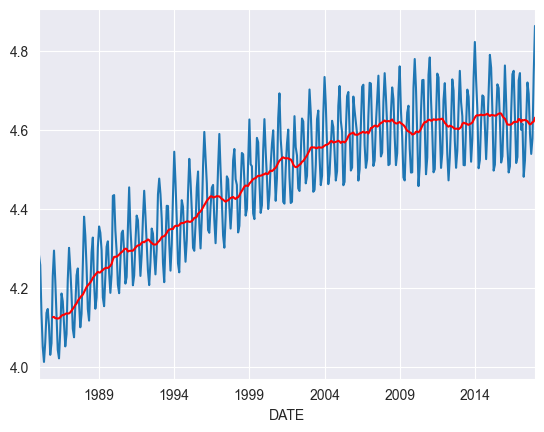

In [55]:
df_log = np.log(df)
ma_log = df_log.rolling(12).mean()


f, ax = plt.subplots()

df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False, color='red')
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

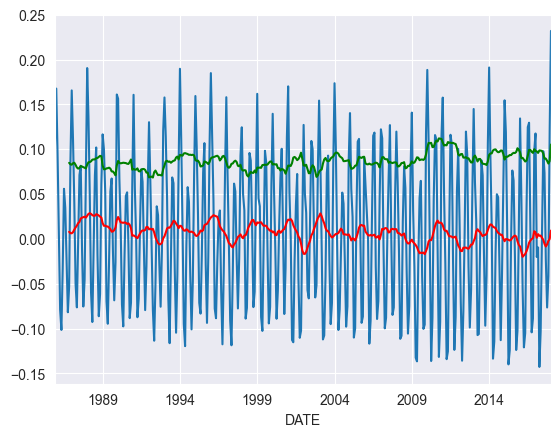

In [56]:
df_sub = (df_log - ma_log).dropna()

ma_sub = df_sub.rolling(12).mean()

std = df_sub.rolling(12).std()

f, ax = plt.subplots()

df_sub.plot(ax=ax, legend=False)
ma_sub.plot(ax=ax, legend=False, color='red')
std.plot(ax=ax, legend=False, color='green')
plt.tight_layout


In [57]:
x_sub = df_sub["Value"].values
result_sub = adfuller(x_sub)

print("Teste ADF")
print(f"Teste Estatístico: {result_sub[0]}")
print(f"Teste P-Value: {result_sub[1]}")
print("Valores críticos: ")

for key, value in result_sub[4].items():
  print(f"\t{key}: {value}")


Teste ADF
Teste Estatístico: -5.211586185365449
Teste P-Value: 8.32563975994576e-06
Valores críticos: 
	1%: -3.448147967010838
	5%: -2.8693833397824413
	10%: -2.5709483564645725


Teste ADF
Teste Estatístico: -7.651129568145193
Teste P-Value: 1.7881267354355252e-11
Valores críticos: 
	1%: -3.448294490928673
	5%: -2.869447722240253
	10%: -2.570982681065269


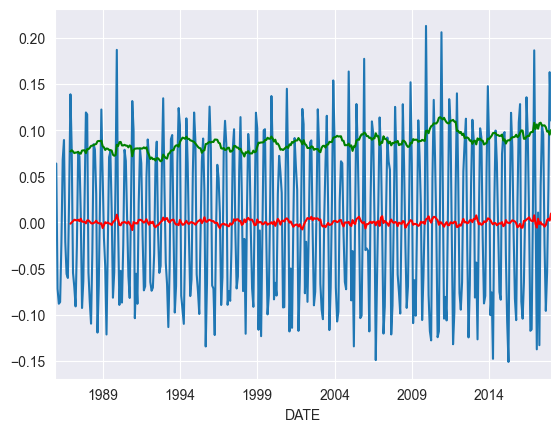

In [58]:
df_diff = df_sub.diff(1)
ma_diff = df_diff.rolling(12).mean()

std_diff = df_diff.rolling(12).std()

f, ax = plt.subplots()
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color='red')
std_diff.plot(ax=ax, legend=False, color='green')
plt.tight_layout

x_diff = df_diff["Value"].dropna().values
result_diff = adfuller(x_diff)


print("Teste ADF")
print(f"Teste Estatístico: {result_diff[0]}")
print(f"Teste P-Value: {result_diff[1]}")
print("Valores críticos: ")

for key, value in result_diff[4].items():
  print(f"\t{key}: {value}")



In [59]:
# ARIMA - (AR) - Autoregressivo, I: Integrado, MA: Moving Average 

# A(x,y,z) -> ACF, PACF

In [60]:
lag_acf = acf(df_diff.dropna(), nlags = 25)
lag_pacf = pacf(df_diff.dropna(), nlags= 25)

In [61]:
# 5% ACF

# 1.96/sqrt(N-d) -> N - números de pontos do df e d é o número de vezes que nós diferenciamos o df

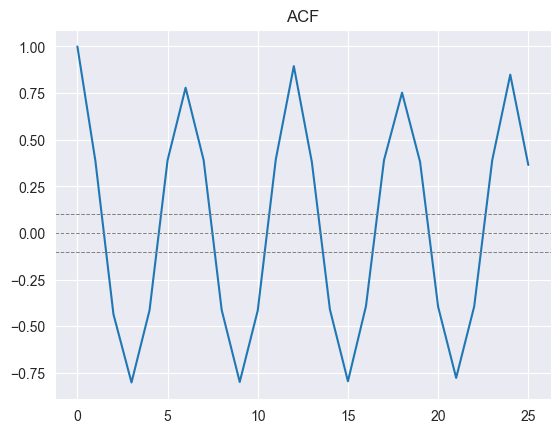

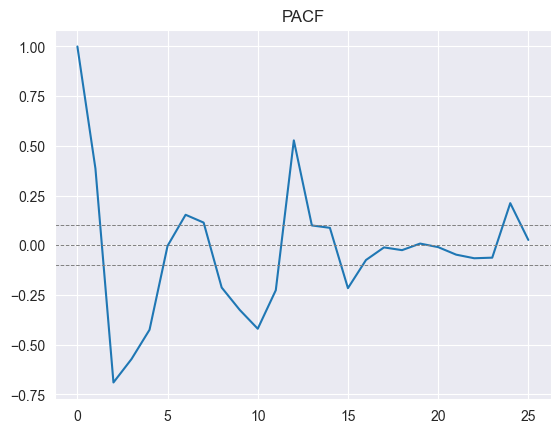

In [62]:
plt.plot(lag_acf)
plt.axhline(y=-1.96/(np.sqrt((len(df_diff)-1))), linestyle = '--', color='gray', linewidth = 0.7)
plt.axhline(y=0, linestyle = '--', color='gray', linewidth = 0.7)
plt.axhline(y=1.96/(np.sqrt((len(df_diff)-1))), linestyle = '--', color='gray', linewidth = 0.7)

plt.title("ACF")
plt.show()

plt.plot(lag_pacf)
plt.axhline(y=-1.96/(np.sqrt((len(df_diff)-1))), linestyle = '--', color='gray', linewidth = 0.7)
plt.axhline(y=0, linestyle = '--', color='gray', linewidth = 0.7)
plt.axhline(y=1.96/(np.sqrt((len(df_diff)-1))), linestyle = '--', color='gray', linewidth = 0.7)

plt.title("PACF")
plt.show()

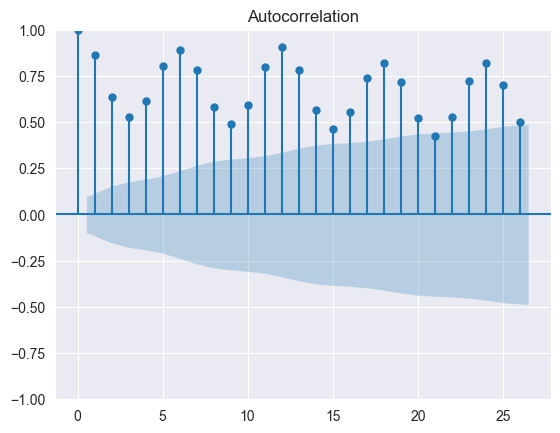

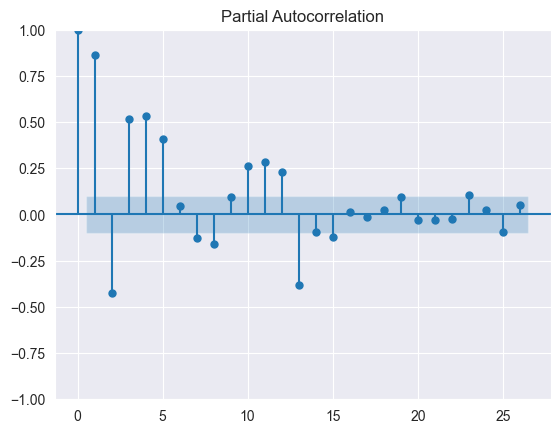

In [64]:
plot_acf(df["Value"])
plot_pacf(df["Value"])
plt.show()
